In [68]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from loadingData import *

df=loadData()

In [69]:
clusters = 10
top_limit = 10
max_iter = 100
n_init = 5

In [70]:
tag_series = df['tags']
posts = []
for index, tag_list in tag_series.items():
    if len(tag_list) > 0:
        posts.append(" ".join(tag_list))
        
print(len(posts))
print(posts[0])
print(posts[1])

64105
فيان_الخالدي
tavastia tavastiaklubi


In [71]:
vectorizer = TfidfVectorizer()
posts_matrix = vectorizer.fit_transform(posts)

In [72]:
model = KMeans(
    n_clusters=clusters,
    init='k-means++',
    max_iter=max_iter,
    n_init=n_init,
)

post_clusters = model.fit_predict(posts_matrix)
ordered_centers = model.cluster_centers_.argsort()[:, ::-1]
tags = vectorizer.get_feature_names()



In [73]:
from collections import Counter
most_common = Counter(" ".join(posts).split()).most_common(100)
dict_common = dict(most_common)
for idx, cluster in enumerate(ordered_centers):
    print(f"CLUSTER {idx + 1}:")
    for tag_in_cluster in cluster[:top_limit]:
        tg = tags[tag_in_cluster]
        if tags[tag_in_cluster] in dict_common.keys():
            print(f"#{tags[tag_in_cluster]} TOP100 frequency {dict_common[tags[tag_in_cluster]]}")
        else:
            print(f"#{tags[tag_in_cluster]}")


CLUSTER 1:
#mikkolautiainenart
#pastelonpaper
#pastelpainting
#fineart
#visualart TOP100 frequency 639
#artwork TOP100 frequency 669
#contemporaryart TOP100 frequency 872
#painting TOP100 frequency 955
#art TOP100 frequency 2412
#character
CLUSTER 2:
#glitchart
#finlandart
#musiclife
#progressivehouse
#songwriting
#producerlife
#musicianlife
#housemusic
#edm
#pop
CLUSTER 3:
#helsinki TOP100 frequency 15226
#finland TOP100 frequency 7924
#myhelsinki TOP100 frequency 3639
#suomi TOP100 frequency 3040
#visithelsinki TOP100 frequency 2049
#visitfinland TOP100 frequency 1665
#autumn TOP100 frequency 1189
#helsinkiofficial TOP100 frequency 768
#helsinkifinland TOP100 frequency 862
#ourfinland TOP100 frequency 725
CLUSTER 4:
#summer TOP100 frequency 2111
#helsinki TOP100 frequency 15226
#kesä TOP100 frequency 831
#naturephotography TOP100 frequency 1201
#finland TOP100 frequency 7924
#luonto TOP100 frequency 708
#nature TOP100 frequency 1753
#maisema
#nature_brilliance TOP100 frequency 451
#l

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [75]:
max_items = np.random.choice(range(len(posts)), size=2000, replace=False)
pca = PCA(n_components=2).fit_transform(posts_matrix[max_items, :].todense())
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(posts_matrix[max_items,:].todense()))

In [76]:
labels = model.labels_[max_items]

Text(0.5, 1.0, 'TSNE Cluster Plot')

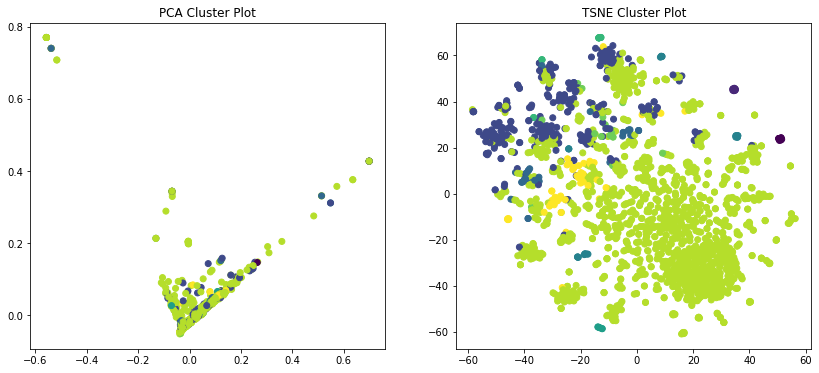

In [77]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
ax[0].scatter(data2D[:, 0], data2D[:, 1], c=labels)
ax[0].set_title('PCA Cluster Plot')

ax[1].scatter(tsne[:, 0], tsne[:, 1], c=labels)
ax[1].set_title('TSNE Cluster Plot')